# Emotion Detection

In this notebook we will go through the whole process of data collection and cleaning, some exploration and then model building. The goal is to detect emotions related to anxiety and depression so that we can get these from a user inputted text box and then feed that into another machine learning algorithm that will take anxiety and depression levels and recommend music genres to listen to. The purpose of this is to help their mental health, like a music therapist in its simplistic form.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

## Data Collection

### Dataset 1

This dataset came from here: https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text

These are tweets but we can still use the to detect emotions.

In [2]:
df1 = pd.read_csv("../data/emotion_detection_1/tweet_emotions.csv")
df1.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
Counter(df1['sentiment'])

Counter({'empty': 827,
         'sadness': 5165,
         'enthusiasm': 759,
         'neutral': 8638,
         'worry': 8459,
         'surprise': 2187,
         'love': 3842,
         'fun': 1776,
         'hate': 1323,
         'happiness': 5209,
         'boredom': 179,
         'relief': 1526,
         'anger': 110})

Just taking a look at some text more closely.

In [4]:
print(df1[df1['sentiment'] == 'sadness']['content'].index)

Int64Index([    1,     2,     6,     8,     9,    12,    13,    15,    17,
               19,
            ...
            39739, 39815, 39826, 39827, 39873, 39882, 39894, 39909, 39939,
            39965],
           dtype='int64', length=5165)


In [5]:
df1[df1['sentiment'] == 'sadness']['content'][1]

'Layin n bed with a headache  ughhhh...waitin on your call...'

### Dataset 2

This dataset came from here: https://www.kaggle.com/datasets/parulpandey/emotion-dataset?select=training.csv

It is already split, but let's put them together and then split the whole dataset on our own.

In [6]:
df2_train = pd.read_csv("../data/emotion_detection_2/training.csv")
df2_validation = pd.read_csv("../data/emotion_detection_2/validation.csv")
df2_test = pd.read_csv("../data/emotion_detection_2/test.csv")

In [7]:
df2 = pd.concat([df2_train, df2_validation, df2_test], axis = 0)

print(df2.shape)
df2.head()

(20000, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


We have the following map: sadness (0), joy (1), love (2), anger (3), fear (4) so let's make this replacement now.

In [8]:
emo_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

df2['label'] = df2['label'].replace(emo_map)

In [9]:
df2.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
Counter(df2['label'])

Counter({'sadness': 5797,
         'anger': 2709,
         'love': 1641,
         'surprise': 719,
         'fear': 2373,
         'joy': 6761})

### Dataset 3



In [11]:
df3 = pd.read_csv("../data/emotion_detection_3/emotion-dataset.csv")
df3.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [12]:
Counter(df3['Emotion'])

Counter({'neutral': 2254,
         'joy': 11045,
         'sadness': 6722,
         'fear': 5410,
         'surprise': 4062,
         'anger': 4297,
         'shame': 146,
         'disgust': 856})

### Getting full dataset

Now let's put these all together. First let's rename the features to be consistent.

In [13]:
df1.rename(columns={'sentiment': 'emotion', 'content': 'text'}, inplace = True)

#also, we don't need the id column
df1.drop(['tweet_id'], axis = 1, inplace = True)

df1 = df1[['text', 'emotion']]

df1.head()

,text,emotion
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [14]:
df2.rename(columns={'text': 'text', 'label': 'emotion'}, inplace = True)

df2.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [15]:
df3.rename(columns={'Emotion': 'emotion', 'Text': 'text'}, inplace = True)

df3 = df3[['text', 'emotion']]

df3.head()

,text,emotion
0,Why ?,neutral
1,Sage Act upgrade on my to do list for tommorow.,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness
3,Such an eye ! The true hazel eye-and so brill...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy


Now putting them all together.

In [16]:
df = pd.concat([df1, df2, df3], axis=0)

#we need to reset the index as well
df.reset_index(drop = True, inplace = True)

df.head()

,text,emotion
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [17]:
df.shape

(94792, 2)

In [18]:
#just checking this for the 3 datasets and the combined one to see if there is any duplicated data from combining these.
#Note there are in the individual datasets - probably texts that were automated suggested messages - 
#but just wanted to quickly make sure these three datasets didn't pull data from the same source.
#looks like everything is good though

#Counter(df['text']).most_common()

## Text Cleaning

Now lets clean the text for modelling. Since this is sentiment analysis, I am going to use some functions from a previous similar project I did, which are just typical text cleaning functions (https://github.com/RavinderRai/Amazon_Instrument_Sentiment_Analysis/tree/main).

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [20]:
#make a copy just in case
df_clean = df.copy()

In [21]:
english_punctuations = string.punctuation

punctuations_list = english_punctuations

#keep exclamation and question mark, since this can help explain emotion from text
punctuations_list = punctuations_list.replace('!', '')
punctuations_list = punctuations_list.replace('?', '')
punctuations_list

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [22]:
df_clean['text'] = df_clean['text'].apply(cleaning_punctuations)

Next let's remove stop words.

In [23]:
english_stop_words = stopwords.words('english')

def remove_stop_words(text):
    #get the words in the review as a list
    text_words = text.split()
    
    #make a new list with the same words but only if they are not a stop word
    removed_stop_words_list = [word for word in text_words if word not in english_stop_words]
    
    removed_stop_words = ' '.join(removed_stop_words_list)
    
    return removed_stop_words

In [24]:
df_clean['text'] = df_clean['text'].apply(remove_stop_words)

Let's lemmatize the text now, since it is usually better then stemming and shouldn't take too long in this case.

In [25]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    #get review text as a list of words
    text_list = text.split()
    
    #lemmatize the words
    lemmatized_list = [lemmatizer.lemmatize(word) for word in text_list]
    
    #make it into a string again
    lemmatized_text = ' '.join(lemmatized_list)
    
    return lemmatized_text


In [26]:
df_clean['text'] = df_clean['text'].apply(lemmatization)

Finally, lower case and tokenize to finish this.

In [27]:
df_clean['text'] = df_clean['text'].str.lower()

df_clean['text'] = df_clean['text'].apply(lambda x: word_tokenize(x))

## Pre-processing

Don't care about positive emotions, only negative.

In [28]:
Counter(df_clean['emotion'])

Counter({'empty': 827,
         'sadness': 17684,
         'enthusiasm': 759,
         'neutral': 10892,
         'worry': 8459,
         'surprise': 6968,
         'love': 5483,
         'fun': 1776,
         'hate': 1323,
         'happiness': 5209,
         'boredom': 179,
         'relief': 1526,
         'anger': 7116,
         'fear': 7783,
         'joy': 17806,
         'shame': 146,
         'disgust': 856})

We want to predict depression and anxiety, so sadness and emptyness will be linked to depression and worry and fear will be linked to anxiety. Everything else is not needed for now.

In [29]:
negative_emotions = ['empty', 'sadness', 'worry', 'fear']

neg_df = df_clean[df_clean['emotion'].isin(negative_emotions)]

neg_df.head()

,text,emotion
0,"[tiffanylue, know, listenin, bad, habit, earli...",empty
1,"[layin, n, bed, headache, ughhhhwaitin, call]",sadness
2,"[funeral, ceremonygloomy, friday]",sadness
5,"[repinging, ghostridah14, didnt, go, prom, ?, ...",worry
6,"[i, sleep, im, not, !, thinking, old, friend, ...",sadness


In [30]:
Counter(neg_df['emotion'])

Counter({'empty': 827, 'sadness': 17684, 'worry': 8459, 'fear': 7783})

In [54]:
neg_df

,text,emotion
0,"[tiffanylue, know, listenin, bad, habit, earli...",empty
1,"[layin, n, bed, headache, ughhhhwaitin, call]",sadness
2,"[funeral, ceremonygloomy, friday]",sadness
5,"[repinging, ghostridah14, didnt, go, prom, ?, ...",worry
6,"[i, sleep, im, not, !, thinking, old, friend, ...",sadness
...,...,...
94774,"[if, child, reassure, something, done, provide...",fear
94781,"[tom, shakeshaft, 15, reveals, dismay, plan, d...",fear
94782,"[juliecarney27, world, pain, but, got, upbough...",fear
94790,"[youu, call, jealousy, i, call, losing, you]",fear


Let's save this dataframe in case we want it for another notebook.

In [56]:
import pickle
file_path = 'negative_emotions_df.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(neg_df, file)

## Modeling

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D, Flatten
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier    #deprecated and gave errors
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

seed = 2
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import random
random.seed(seed)

In [32]:
X = neg_df['text'].str.join(' ')
y = neg_df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [163]:
tfidf = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,2))

tfidf_X_train = tfidf.fit_transform(X_train)
tfidf_X_test = tfidf.transform(X_test)


In [164]:
tfidf_X_train

<26064x150940 sparse matrix of type '<class 'numpy.float64'>'
	with 150940 stored elements in Compressed Sparse Row format>

In [33]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [198]:
print(Counter(y_train))
print(Counter(y_test))
print(Counter(neg_df['emotion']))

Counter({2: 13251, 3: 6397, 1: 5811, 0: 605})
Counter({2: 4433, 3: 2062, 1: 1972, 0: 222})
Counter({'sadness': 17684, 'worry': 8459, 'fear': 7783, 'empty': 827})


In [144]:
nb = MultinomialNB()

nb_tfidf = nb.fit(tfidf_X_train, y_train)

In [145]:
nb_tfidf_predict = nb.predict(tfidf_X_test)

In [146]:
nb.score(tfidf_X_train, y_train)

0.8961402701043585

In [147]:
nb.score(tfidf_X_test, y_test)

0.5497755783174129

In [148]:
confusion_matrix(y_test, nb_tfidf_predict)

array([[   0,    0,  222,    0],
       [   0,  343, 1627,    2],
       [   0,    3, 4412,   18],
       [   0,    1, 2039,   22]], dtype=int64)

In [157]:
def plot_train_val_scores(model, param_name, param_range, logplot = False, scoring_metric='f1_macro', y_label='f1 score'):
    #using the validation_curve function to get the score values
    train_scores, valid_scores = validation_curve(model, tfidf_X_train, y_train, 
                                                  param_name=param_name, 
                                                  param_range=param_range, 
                                                  cv=5,
                                                  scoring=scoring_metric, 
                                                  n_jobs=-1)
    
    #take the mean of the cross validation scores and plot these
    train_scores_mean = train_scores.mean(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)
    
    #if the var_smoothing parameter ranges increase exponentially, we need to take the log of it to get a better visual
    if logplot:
        plt.semilogx(param_range, train_scores_mean, label="Training score")
        plt.semilogx(param_range, valid_scores_mean, label="Validation score")
    else:
        plt.plot(param_range, train_scores_mean, label="Training score")
        plt.plot(param_range, valid_scores_mean, label="Validation score")
    
    plt.title('Training and validation scores for {} parameter values'.format(param_name))
    plt.xlabel('parameter range')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

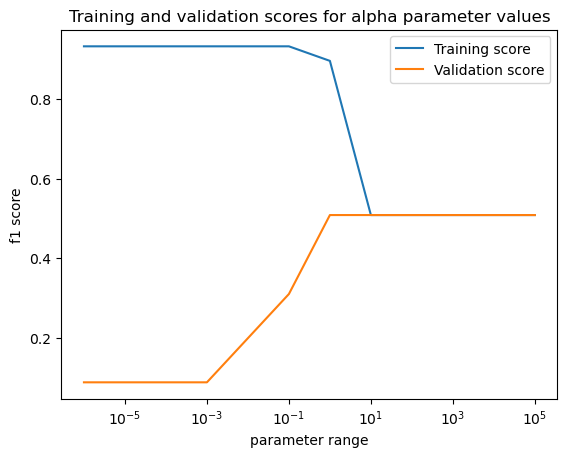

In [160]:
parameter_range = [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]

plot_train_val_scores(MultinomialNB(), 'alpha', parameter_range, scoring_metric='f1_micro', logplot = True)

## Neural Networks

In [169]:
max_vocab = 5000

tokenizer = Tokenizer(max_vocab)

In [170]:
tokenizer.fit_on_texts(X_train)

In [171]:
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

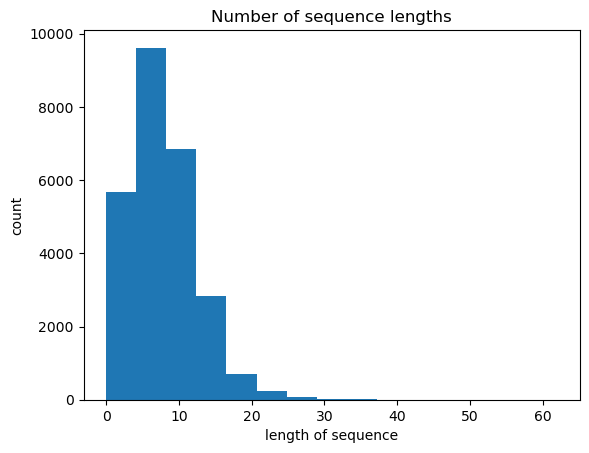

In [173]:
plt.hist([len(seq) for seq in train_sequence], bins = 15)
plt.title('Number of sequence lengths')
plt.ylabel('count')
plt.xlabel('length of sequence')
plt.show()

In [174]:
padded_train_sequence = pad_sequences(train_sequence, maxlen=40)
padded_test_sequence = pad_sequences(test_sequence, maxlen=40)

padded_train_sequence.shape

(26064, 40)

In [175]:
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)

In [185]:
model=Sequential()
model.add(Embedding(max_vocab, 1000, input_length=40))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

#getting the metrics, some from tensorflow add ons
f1_score_macro = tfa.metrics.F1Score(num_classes=4, average='macro', name = 'f1_macro')
f1_score_weighted = tfa.metrics.F1Score(num_classes=4, average='weighted', name = 'f1_weighted')
kappa = tfa.metrics.CohenKappa(num_classes=4, weightage = None, name = 'kappa')
matthew = tfa.metrics.MatthewsCorrelationCoefficient(num_classes=4)

#categorical_crossentropy is for multiclassification, but we need one hot-encoded targets, which we did above
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score_macro, f1_score_weighted, kappa, matthew])

In [186]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 1000)          5000000   
                                                                 
 global_average_pooling1d_3   (None, 1000)             0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 32)                32032     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 5,032,164
Trainable params: 5,032,164
Non-trainable params: 0
____________________________________________

In [187]:
model.fit(padded_train_sequence, 
          yy_train,
          validation_split = 0.25,
          batch_size = 32,
          epochs = 15,
          class_weight = None
         )

Epoch 1/15
611/611 [==============================] - 15s 15ms/step - loss: 0.9796 - accuracy: 0.5726 - f1_macro: 0.3439 - f1_weighted: 0.5118 - kappa: 0.2059 - MatthewsCorrelationCoefficient: 0.2525 - val_loss: 0.7760 - val_accuracy: 0.6567 - val_f1_macro: 0.4489 - val_f1_weighted: 0.6164 - val_kappa: 0.4019 - val_MatthewsCorrelationCoefficient: 0.4351
Epoch 2/15
611/611 [==============================] - 9s 15ms/step - loss: 0.6907 - accuracy: 0.7097 - f1_macro: 0.5256 - f1_weighted: 0.7004 - kappa: 0.5257 - MatthewsCorrelationCoefficient: 0.5272 - val_loss: 0.7272 - val_accuracy: 0.6789 - val_f1_macro: 0.5149 - val_f1_weighted: 0.6768 - val_kappa: 0.4946 - val_MatthewsCorrelationCoefficient: 0.4977
Epoch 3/15
611/611 [==============================] - 9s 15ms/step - loss: 0.6021 - accuracy: 0.7509 - f1_macro: 0.5648 - f1_weighted: 0.7452 - kappa: 0.6008 - MatthewsCorrelationCoefficient: 0.6015 - val_loss: 0.7652 - val_accuracy: 0.6779 - val_f1_macro: 0.4959 - val_f1_weighted: 0.6619

In [203]:
#np.argmax(model.predict(padded_test_sequence), axis = 1)

272/272 [==============================] - 1s 3ms/step


array([2, 2, 3, ..., 2, 2, 2], dtype=int64)

In [188]:
def get_test_predictions(X_test, NN_model):
    y_pred = NN_model.predict(X_test)

    #the model predicts probablilites, so we need to turn them into classes by taking the largest probability
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

In [189]:
y_pred_classes = get_test_predictions(padded_test_sequence, NN_model = model)

272/272 [==============================] - 1s 3ms/step


In [ ]:
Counter(y_pred_classes)

In [57]:
def get_test_predictions(X_test, model):
    y_pred = model.predict(X_test)

    #the model predicts probablilites, so we need to turn them into classes by taking the largest probability
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

In [214]:
def plot_metric_history(metrics, suptitle = 'Evaluation metrics'):
    fig, axes = plt.subplots(2, 2, figsize=(12,8))

    #axes[0, 0].plot(metrics['accuracy'])
    #axes[0, 0].plot(metrics['val_accuracy'])
    #axes[0, 0].set_title('accuracy')

    axes[0, 0].plot(metrics['f1_macro'])
    axes[0, 0].plot(metrics['val_f1_macro'])
    axes[0, 0].set_title('f1_macro')

    axes[0, 1].plot(metrics['f1_weighted'])
    axes[0, 1].plot(metrics['val_f1_weighted'])
    axes[0, 1].set_title('f1_weighted')

    axes[1, 0].plot(metrics['kappa'])
    axes[1, 0].plot(metrics['val_kappa'])
    axes[1, 0].set_title('cohen_kappa')

    axes[1, 1].plot(metrics['MatthewsCorrelationCoefficient'])
    axes[1, 1].plot(metrics['val_MatthewsCorrelationCoefficient'])
    axes[1, 1].set_title('Matthews Correlation Coefficient')
    
    plt.suptitle(suptitle)

    plt.show()

In [199]:
def plot_con_mat(y_test, y_pred, title):
    con_mat = confusion_matrix(y_test, y_pred)

    sns.heatmap(con_mat, annot = True, fmt = 'g', cmap='Blues', annot_kws={"size": 14},
                xticklabels = ["empty", "fear", "sadness", "worry"], yticklabels = ["empty", "fear", "sadness", "worry"])
    plt.xlabel('predicted', fontsize=16)
    plt.ylabel('actual', fontsize=16)
    plt.title(title, fontsize=18)
    plt.show()


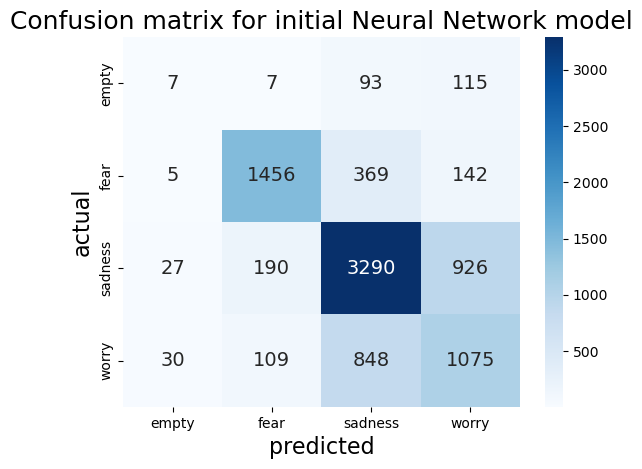

              precision    recall  f1-score   support

           0       0.10      0.03      0.05       222
           1       0.83      0.74      0.78      1972
           2       0.72      0.74      0.73      4433
           3       0.48      0.52      0.50      2062

    accuracy                           0.67      8689
   macro avg       0.53      0.51      0.51      8689
weighted avg       0.67      0.67      0.67      8689



In [200]:
plot_con_mat(y_test, y_pred_classes, 'Confusion matrix for initial Neural Network model')

print(classification_report(y_test, y_pred_classes))

In [206]:
def buildmodel(learning_rate = 0.001, dropout = 0.3):
    model = Sequential([
        Embedding(max_vocab, 1000, input_length=40),
        GlobalAveragePooling1D(),
        Dense(32, activation='relu'),
        Dropout(dropout),
        Dense(4,activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate = learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score_macro, f1_score_weighted, kappa, matthew])
    
    return model


Epoch 1/8
611/611 [==============================] - 10s 15ms/step - loss: 0.9577 - accuracy: 0.5737 - f1_macro: 0.3973 - f1_weighted: 0.5591 - kappa: 0.2799 - MatthewsCorrelationCoefficient: 0.3081 - val_loss: 0.7646 - val_accuracy: 0.6582 - val_f1_macro: 0.4407 - val_f1_weighted: 0.6086 - val_kappa: 0.4018 - val_MatthewsCorrelationCoefficient: 0.4415
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6666 - accuracy: 0.7174 - f1_macro: 0.5338 - f1_weighted: 0.7091 - kappa: 0.5397 - MatthewsCorrelationCoefficient: 0.5408 - val_loss: 0.7256 - val_accuracy: 0.6796 - val_f1_macro: 0.5151 - val_f1_weighted: 0.6765 - val_kappa: 0.4972 - val_MatthewsCorrelationCoefficient: 0.4998
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.5788 - accuracy: 0.7570 - f1_macro: 0.5696 - f1_weighted: 0.7507 - kappa: 0.6094 - MatthewsCorrelationCoefficient: 0.6101 - val_loss: 0.7627 - val_accuracy: 0.6768 - val_f1_macro: 0.4934 - val_f1_weighted: 0.6592 - 

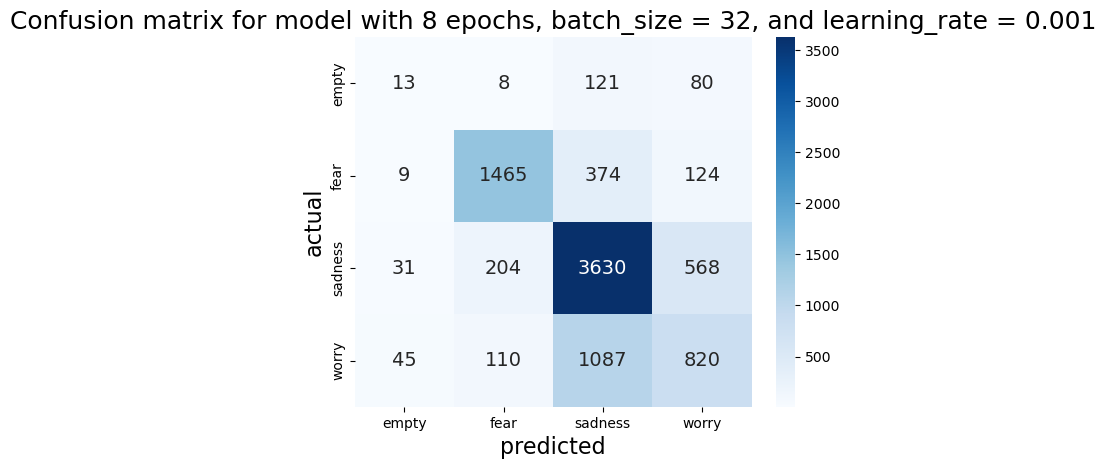

In [230]:
learning_rate = 0.001
batch_size = 32
epoch = 8
dropout = 0.3

#model = buildmodel(learning_rate = learning_rate)

model = Sequential([
    Embedding(max_vocab, 1000, input_length=40),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(dropout),
    Dense(4,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate = learning_rate), 
          loss='categorical_crossentropy', 
          metrics=['accuracy', f1_score_macro, f1_score_weighted, kappa, matthew])

model.fit(padded_train_sequence, 
            yy_train,
            validation_split = 0.25,
            batch_size = batch_size,
            epochs = epoch)
    
metrics = pd.DataFrame(model.history.history)
    
y_pred = get_test_predictions(padded_test_sequence, model)

plot_con_mat(y_test, y_pred, 'Confusion matrix for model with {} epochs, batch_size = {}, and learning_rate = {}'.format(epoch, batch_size, learning_rate))
    

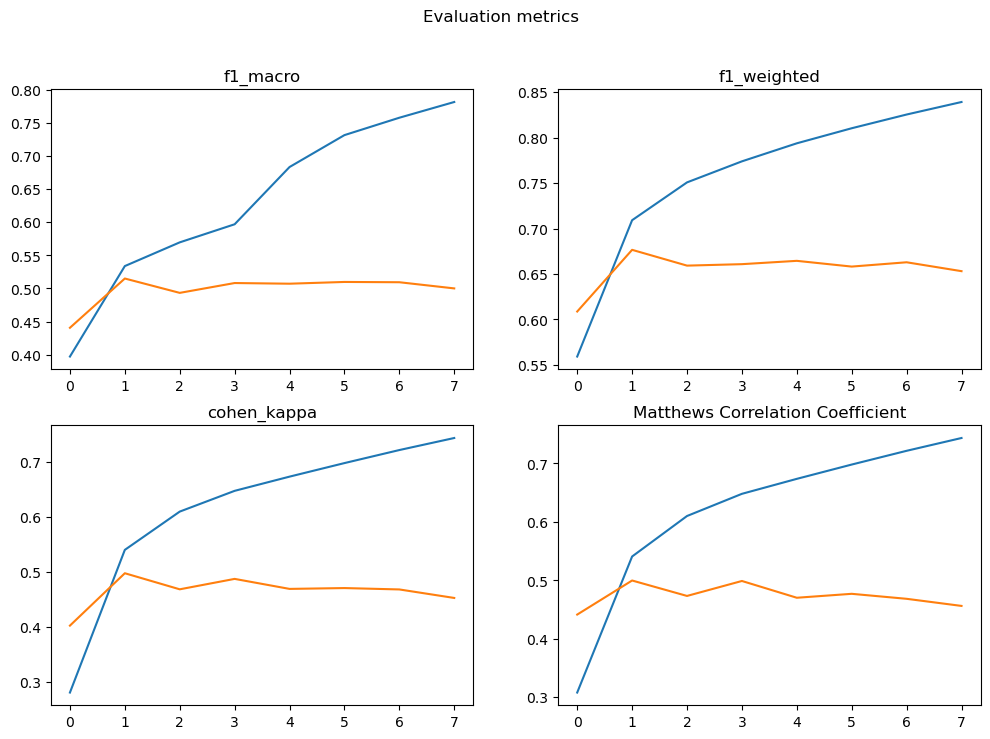

In [235]:
plot_metric_history(metrics)

In [223]:
def build_model_con_mat(epoch = 6, batch_size = 32, learning_rate = 0.001, dropout = 0.3, plot_metrics = False):
    model = buildmodel(learning_rate = learning_rate, dropout = dropout)

    model.fit(padded_train_sequence, 
              yy_train,
              validation_split = 0.25,
              batch_size = batch_size,
              epochs = epoch)
    
    metrics = pd.DataFrame(model.history.history)
    
    y_pred = get_test_predictions(padded_test_sequence, model)

    plot_con_mat(y_test, y_pred, 'Confusion matrix for model with {} epochs, batch_size = {}, and learning_rate = {}'.format(epoch, batch_size, learning_rate))
    
    if plot_metrics:
        #plot the metrics
        plot_metric_history(
            metrics, 
            suptitle = 'Metrics for model with {} epochs, batch_size = {}, and learning_rate = {}'.format(epoch, batch_size, learning_rate))

Epoch 1/8
611/611 [==============================] - 10s 15ms/step - loss: 1.1565 - accuracy: 0.5100 - f1_macro: 0.2804 - f1_weighted: 0.4494 - kappa: 0.1240 - MatthewsCorrelationCoefficient: 0.2001 - val_loss: 1.1184 - val_accuracy: 0.5015 - val_f1_macro: 0.1670 - val_f1_weighted: 0.3350 - val_kappa: 0.0000e+00 - val_MatthewsCorrelationCoefficient: 0.0000e+00
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 1.1053 - accuracy: 0.5109 - f1_macro: 0.1700 - f1_weighted: 0.3462 - kappa: 9.3901e-04 - MatthewsCorrelationCoefficient: 0.0135 - val_loss: 1.0966 - val_accuracy: 0.5015 - val_f1_macro: 0.1673 - val_f1_weighted: 0.3353 - val_kappa: 1.6719e-04 - val_MatthewsCorrelationCoefficient: 0.0042
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 1.0637 - accuracy: 0.5201 - f1_macro: 0.1908 - f1_weighted: 0.3658 - kappa: 0.0249 - MatthewsCorrelationCoefficient: 0.1098 - val_loss: 1.0516 - val_accuracy: 0.5163 - val_f1_macro: 0.1998 - val_f1_wei

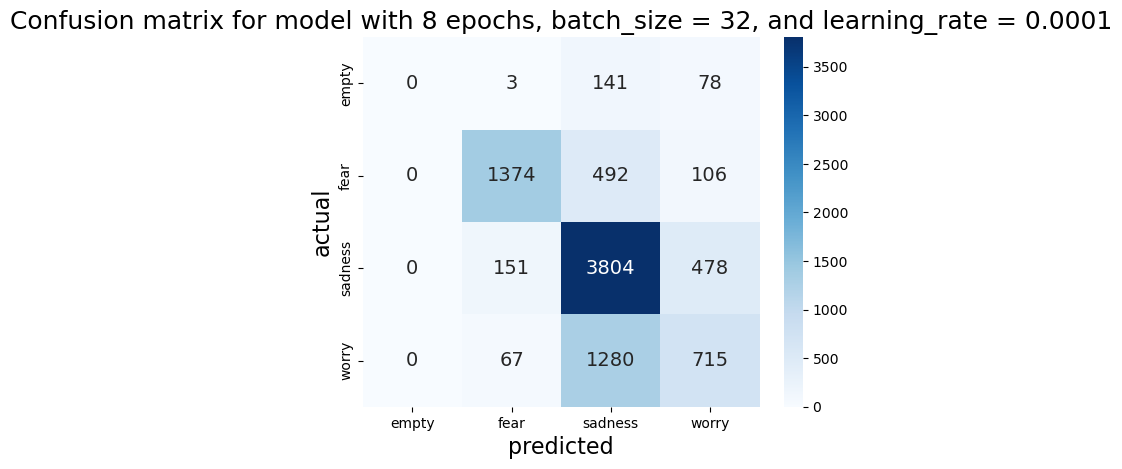

Epoch 1/8
611/611 [==============================] - 11s 16ms/step - loss: 1.0226 - accuracy: 0.5494 - f1_macro: 0.3436 - f1_weighted: 0.5108 - kappa: 0.2160 - MatthewsCorrelationCoefficient: 0.2722 - val_loss: 0.8106 - val_accuracy: 0.6300 - val_f1_macro: 0.3769 - val_f1_weighted: 0.5451 - val_kappa: 0.3237 - val_MatthewsCorrelationCoefficient: 0.4050
Epoch 2/8
611/611 [==============================] - 10s 16ms/step - loss: 0.7309 - accuracy: 0.6879 - f1_macro: 0.4940 - f1_weighted: 0.6682 - kappa: 0.4733 - MatthewsCorrelationCoefficient: 0.4830 - val_loss: 0.7308 - val_accuracy: 0.6757 - val_f1_macro: 0.5059 - val_f1_weighted: 0.6693 - val_kappa: 0.4823 - val_MatthewsCorrelationCoefficient: 0.4831
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6317 - accuracy: 0.7333 - f1_macro: 0.5484 - f1_weighted: 0.7265 - kappa: 0.5685 - MatthewsCorrelationCoefficient: 0.5693 - val_loss: 0.7588 - val_accuracy: 0.6751 - val_f1_macro: 0.4869 - val_f1_weighted: 0.6537 -

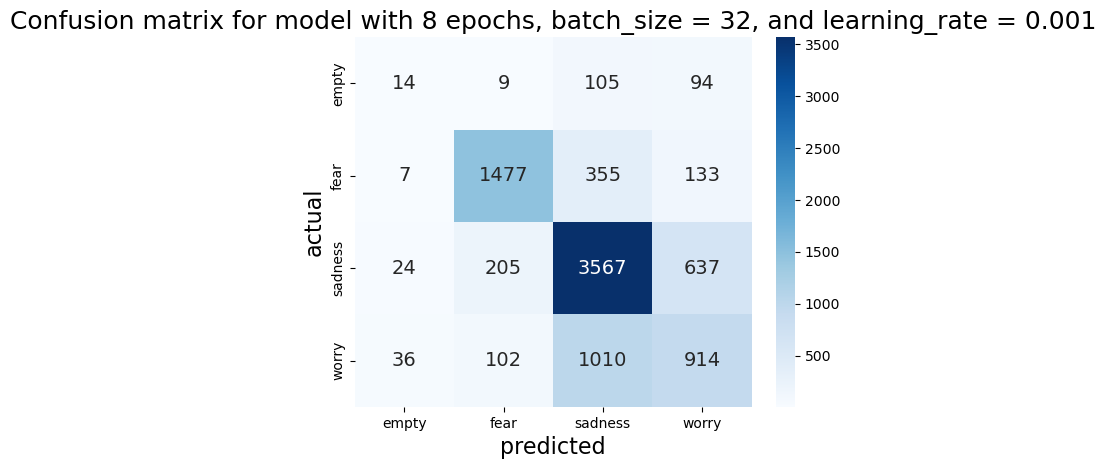

Epoch 1/8
611/611 [==============================] - 11s 16ms/step - loss: 0.8580 - accuracy: 0.6133 - f1_macro: 0.4480 - f1_weighted: 0.6074 - kappa: 0.3662 - MatthewsCorrelationCoefficient: 0.3764 - val_loss: 0.7544 - val_accuracy: 0.6611 - val_f1_macro: 0.4553 - val_f1_weighted: 0.6220 - val_kappa: 0.4175 - val_MatthewsCorrelationCoefficient: 0.4436
Epoch 2/8
611/611 [==============================] - 10s 16ms/step - loss: 0.6714 - accuracy: 0.6954 - f1_macro: 0.5200 - f1_weighted: 0.6885 - kappa: 0.5021 - MatthewsCorrelationCoefficient: 0.5037 - val_loss: 0.7771 - val_accuracy: 0.6716 - val_f1_macro: 0.5084 - val_f1_weighted: 0.6689 - val_kappa: 0.4832 - val_MatthewsCorrelationCoefficient: 0.4862
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6046 - accuracy: 0.7307 - f1_macro: 0.5514 - f1_weighted: 0.7246 - kappa: 0.5624 - MatthewsCorrelationCoefficient: 0.5636 - val_loss: 0.8619 - val_accuracy: 0.6659 - val_f1_macro: 0.4610 - val_f1_weighted: 0.6285 -

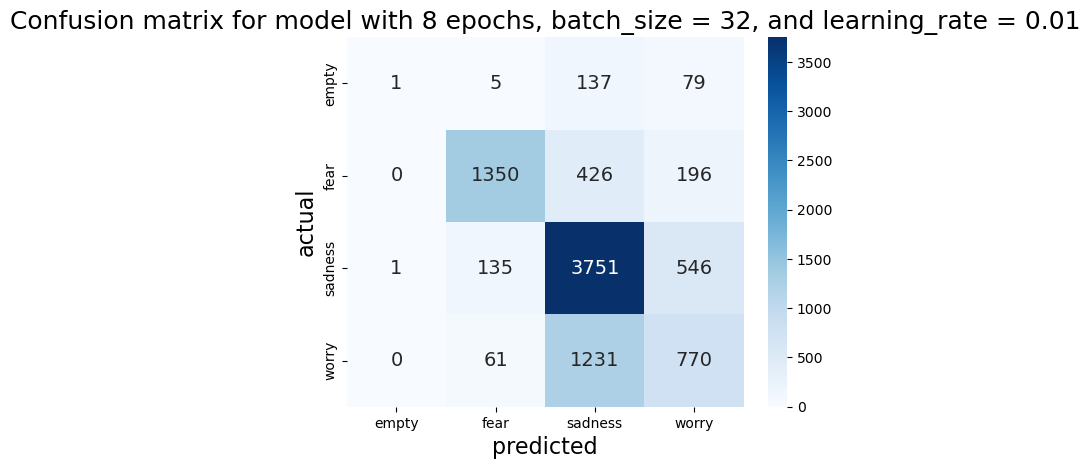

Epoch 1/8
611/611 [==============================] - 11s 16ms/step - loss: 1.1827 - accuracy: 0.5063 - f1_macro: 0.2853 - f1_weighted: 0.4527 - kappa: 0.1241 - MatthewsCorrelationCoefficient: 0.1857 - val_loss: 1.1481 - val_accuracy: 0.5017 - val_f1_macro: 0.1676 - val_f1_weighted: 0.3357 - val_kappa: 5.4795e-04 - val_MatthewsCorrelationCoefficient: 0.0113
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 1.1357 - accuracy: 0.5107 - f1_macro: 0.1691 - f1_weighted: 0.3454 - kappa: 8.5533e-05 - MatthewsCorrelationCoefficient: 0.0030 - val_loss: 1.1351 - val_accuracy: 0.5011 - val_f1_macro: 0.1669 - val_f1_weighted: 0.3348 - val_kappa: -6.7258e-04 - val_MatthewsCorrelationCoefficient: -0.0139
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 1.1108 - accuracy: 0.5108 - f1_macro: 0.1693 - f1_weighted: 0.3455 - kappa: 2.6965e-04 - MatthewsCorrelationCoefficient: 0.0116 - val_loss: 1.1460 - val_accuracy: 0.5011 - val_f1_macro: 0.1669 - val_f1_w

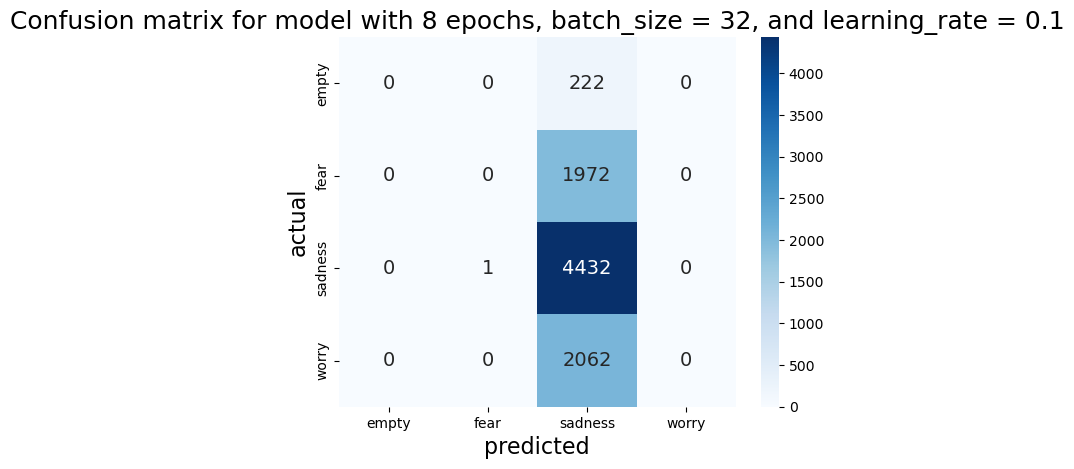

In [220]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    build_model_con_mat(epoch = 8, learning_rate = lr, plot_metrics = True)

Epoch 1/8
611/611 [==============================] - 10s 15ms/step - loss: 1.0697 - accuracy: 0.5207 - f1_macro: 0.2365 - f1_weighted: 0.4047 - kappa: 0.0590 - MatthewsCorrelationCoefficient: 0.0966 - val_loss: 0.8598 - val_accuracy: 0.5876 - val_f1_macro: 0.3205 - val_f1_weighted: 0.4868 - val_kappa: 0.2200 - val_MatthewsCorrelationCoefficient: 0.3271
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 0.7637 - accuracy: 0.6635 - f1_macro: 0.4664 - f1_weighted: 0.6376 - kappa: 0.4213 - MatthewsCorrelationCoefficient: 0.4383 - val_loss: 0.7356 - val_accuracy: 0.6785 - val_f1_macro: 0.4969 - val_f1_weighted: 0.6635 - val_kappa: 0.4740 - val_MatthewsCorrelationCoefficient: 0.4776
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6471 - accuracy: 0.7282 - f1_macro: 0.5446 - f1_weighted: 0.7217 - kappa: 0.5606 - MatthewsCorrelationCoefficient: 0.5613 - val_loss: 0.7597 - val_accuracy: 0.6769 - val_f1_macro: 0.4904 - val_f1_weighted: 0.6572 - 

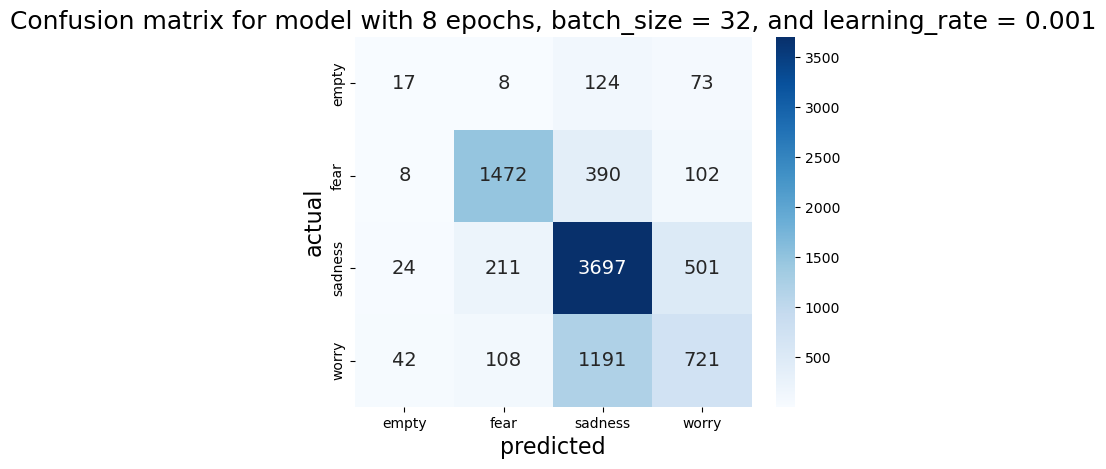

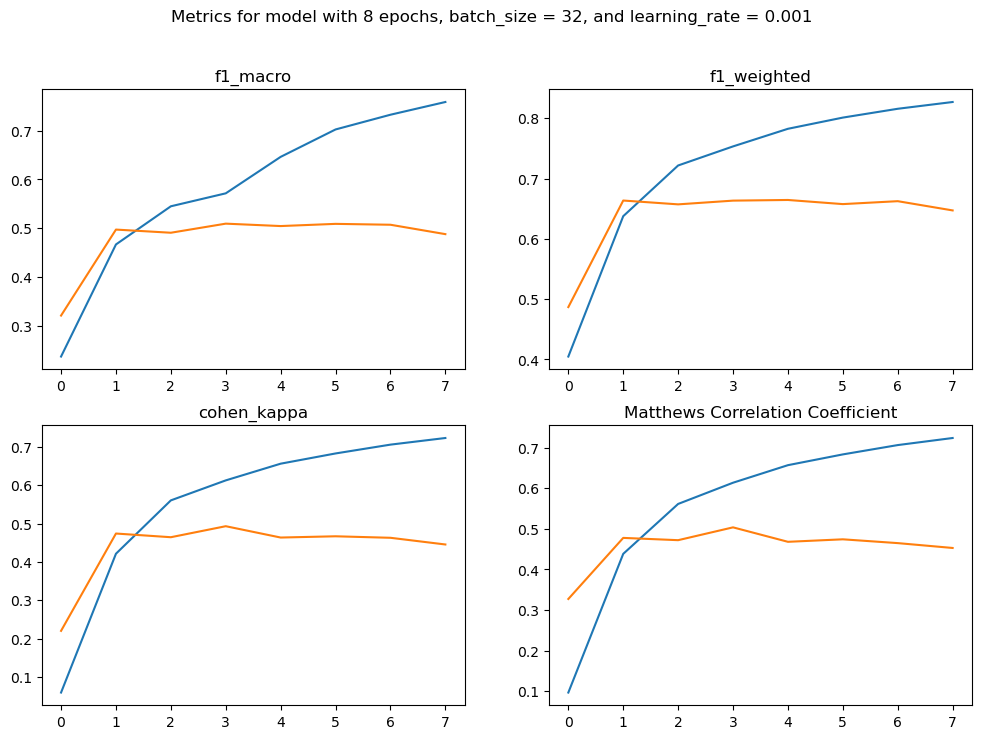

Epoch 1/8
306/306 [==============================] - 6s 17ms/step - loss: 1.0638 - accuracy: 0.5267 - f1_macro: 0.3192 - f1_weighted: 0.4844 - kappa: 0.1698 - MatthewsCorrelationCoefficient: 0.2311 - val_loss: 0.9105 - val_accuracy: 0.5866 - val_f1_macro: 0.3547 - val_f1_weighted: 0.5195 - val_kappa: 0.2324 - val_MatthewsCorrelationCoefficient: 0.3036
Epoch 2/8
306/306 [==============================] - 5s 15ms/step - loss: 0.7661 - accuracy: 0.6737 - f1_macro: 0.4862 - f1_weighted: 0.6575 - kappa: 0.4493 - MatthewsCorrelationCoefficient: 0.4578 - val_loss: 0.7331 - val_accuracy: 0.6782 - val_f1_macro: 0.4967 - val_f1_weighted: 0.6630 - val_kappa: 0.4704 - val_MatthewsCorrelationCoefficient: 0.4753
Epoch 3/8
306/306 [==============================] - 5s 15ms/step - loss: 0.6325 - accuracy: 0.7340 - f1_macro: 0.5478 - f1_weighted: 0.7260 - kappa: 0.5687 - MatthewsCorrelationCoefficient: 0.5695 - val_loss: 0.7524 - val_accuracy: 0.6774 - val_f1_macro: 0.4889 - val_f1_weighted: 0.6559 - v

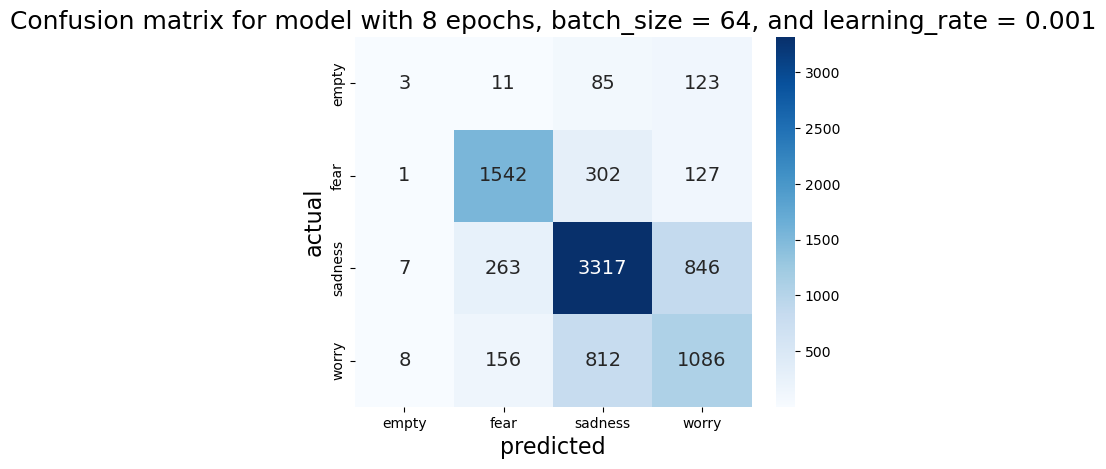

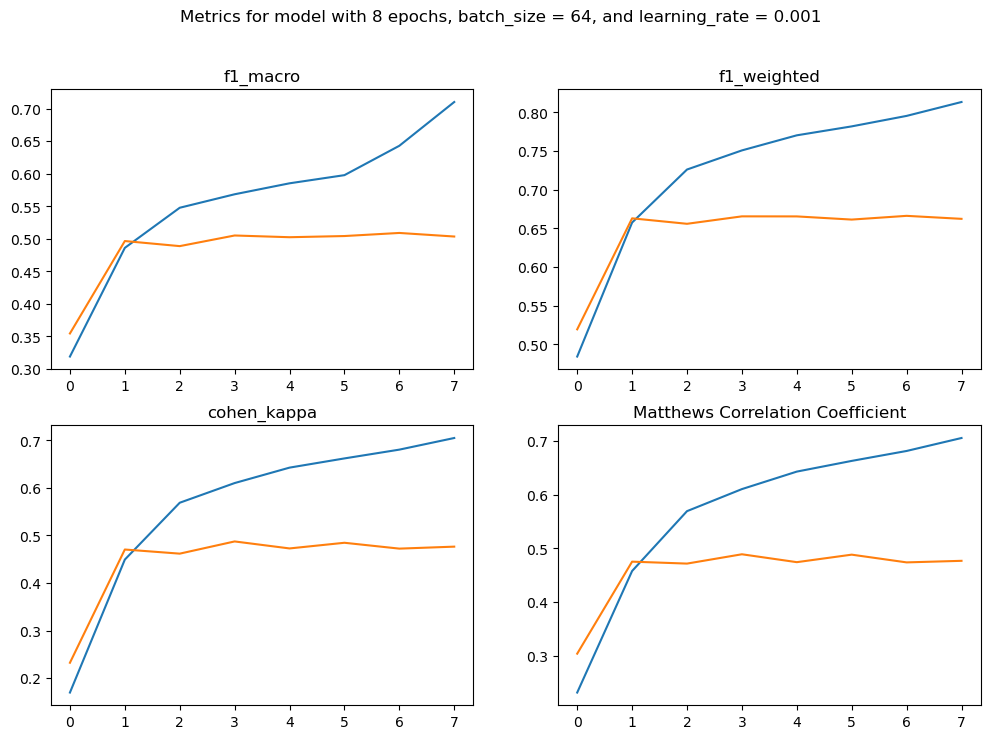

Epoch 1/8
153/153 [==============================] - 4s 20ms/step - loss: 1.1135 - accuracy: 0.5113 - f1_macro: 0.3116 - f1_weighted: 0.4771 - kappa: 0.1547 - MatthewsCorrelationCoefficient: 0.2044 - val_loss: 1.0378 - val_accuracy: 0.5180 - val_f1_macro: 0.2029 - val_f1_weighted: 0.3700 - val_kappa: 0.0420 - val_MatthewsCorrelationCoefficient: 0.1435
Epoch 2/8
153/153 [==============================] - 2s 16ms/step - loss: 0.8852 - accuracy: 0.6114 - f1_macro: 0.3709 - f1_weighted: 0.5414 - kappa: 0.2757 - MatthewsCorrelationCoefficient: 0.3468 - val_loss: 0.7957 - val_accuracy: 0.6558 - val_f1_macro: 0.4576 - val_f1_weighted: 0.6230 - val_kappa: 0.4068 - val_MatthewsCorrelationCoefficient: 0.4317
Epoch 3/8
153/153 [==============================] - 2s 16ms/step - loss: 0.7060 - accuracy: 0.7063 - f1_macro: 0.5167 - f1_weighted: 0.6919 - kappa: 0.5107 - MatthewsCorrelationCoefficient: 0.5163 - val_loss: 0.7715 - val_accuracy: 0.6650 - val_f1_macro: 0.4791 - val_f1_weighted: 0.6449 - v

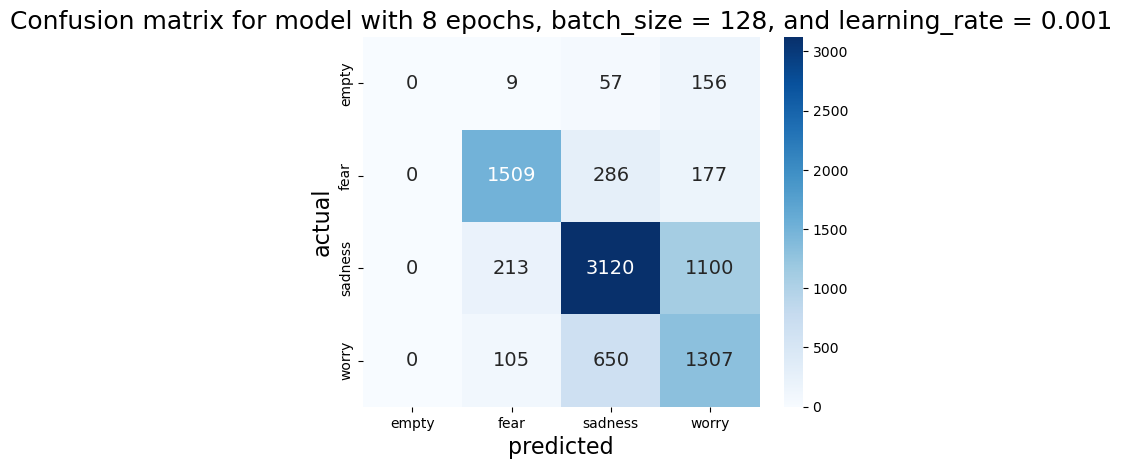

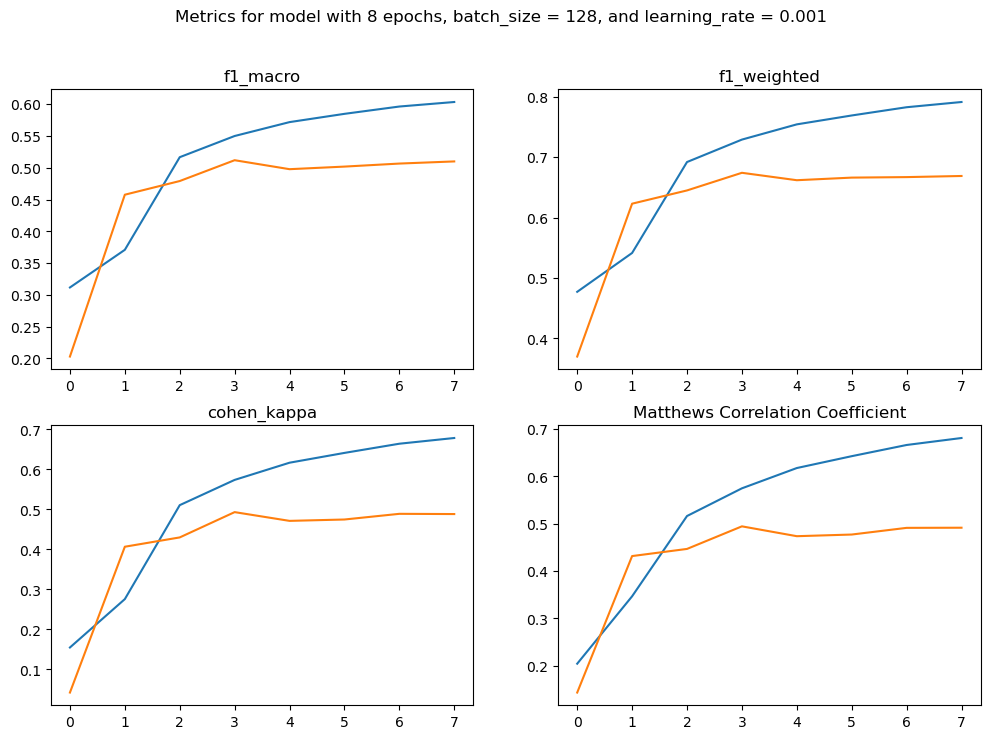

In [222]:
for bs in [32, 64, 128]:
    build_model_con_mat(epoch = 8, batch_size = bs, learning_rate = 0.001, plot_metrics = True)

Epoch 1/8
611/611 [==============================] - 11s 16ms/step - loss: 0.9555 - accuracy: 0.5791 - f1_macro: 0.3525 - f1_weighted: 0.5209 - kappa: 0.2220 - MatthewsCorrelationCoefficient: 0.2741 - val_loss: 0.7666 - val_accuracy: 0.6584 - val_f1_macro: 0.4499 - val_f1_weighted: 0.6174 - val_kappa: 0.4081 - val_MatthewsCorrelationCoefficient: 0.4385
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6581 - accuracy: 0.7203 - f1_macro: 0.5347 - f1_weighted: 0.7113 - kappa: 0.5431 - MatthewsCorrelationCoefficient: 0.5446 - val_loss: 0.7299 - val_accuracy: 0.6766 - val_f1_macro: 0.5138 - val_f1_weighted: 0.6744 - val_kappa: 0.4929 - val_MatthewsCorrelationCoefficient: 0.4961
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.5766 - accuracy: 0.7560 - f1_macro: 0.5677 - f1_weighted: 0.7493 - kappa: 0.6067 - MatthewsCorrelationCoefficient: 0.6073 - val_loss: 0.7721 - val_accuracy: 0.6773 - val_f1_macro: 0.4888 - val_f1_weighted: 0.6556 - 

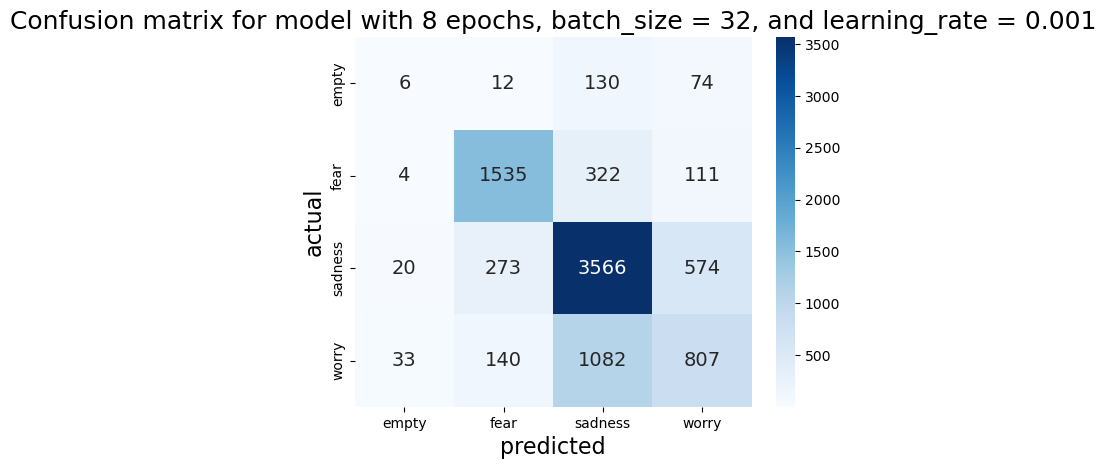

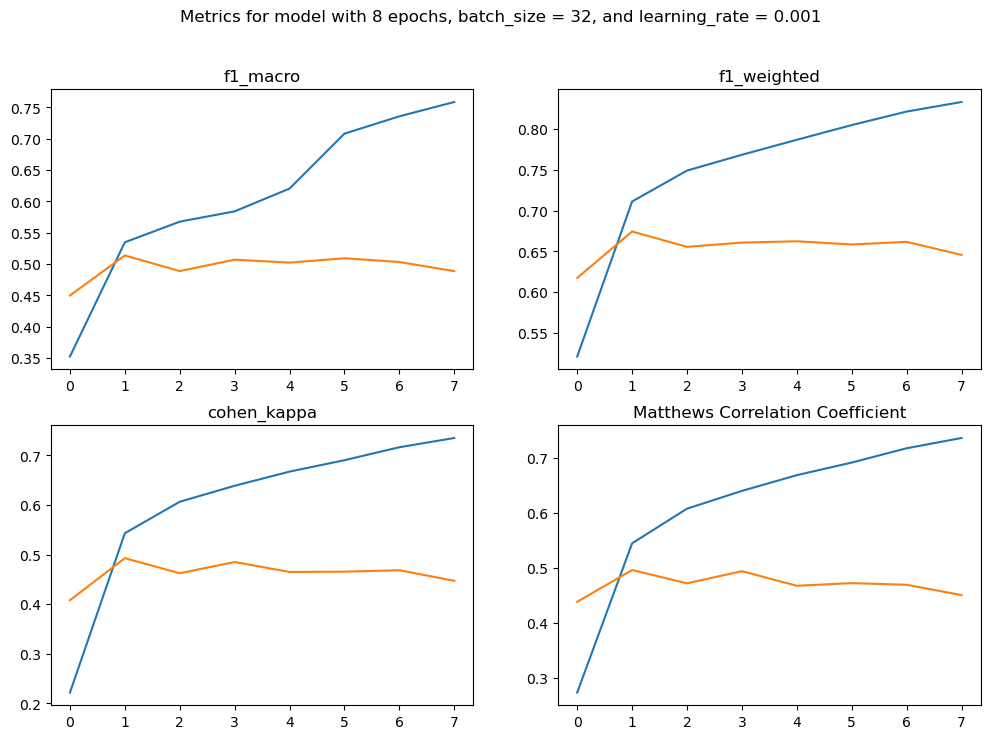

Epoch 1/8
611/611 [==============================] - 10s 15ms/step - loss: 0.9952 - accuracy: 0.5600 - f1_macro: 0.3686 - f1_weighted: 0.5323 - kappa: 0.2433 - MatthewsCorrelationCoefficient: 0.2856 - val_loss: 0.7756 - val_accuracy: 0.6565 - val_f1_macro: 0.4451 - val_f1_weighted: 0.6128 - val_kappa: 0.4035 - val_MatthewsCorrelationCoefficient: 0.4358
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6785 - accuracy: 0.7127 - f1_macro: 0.5300 - f1_weighted: 0.7050 - kappa: 0.5332 - MatthewsCorrelationCoefficient: 0.5341 - val_loss: 0.7284 - val_accuracy: 0.6768 - val_f1_macro: 0.5083 - val_f1_weighted: 0.6707 - val_kappa: 0.4864 - val_MatthewsCorrelationCoefficient: 0.4872
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.5853 - accuracy: 0.7534 - f1_macro: 0.5673 - f1_weighted: 0.7479 - kappa: 0.6047 - MatthewsCorrelationCoefficient: 0.6056 - val_loss: 0.7717 - val_accuracy: 0.6757 - val_f1_macro: 0.4892 - val_f1_weighted: 0.6558 - 

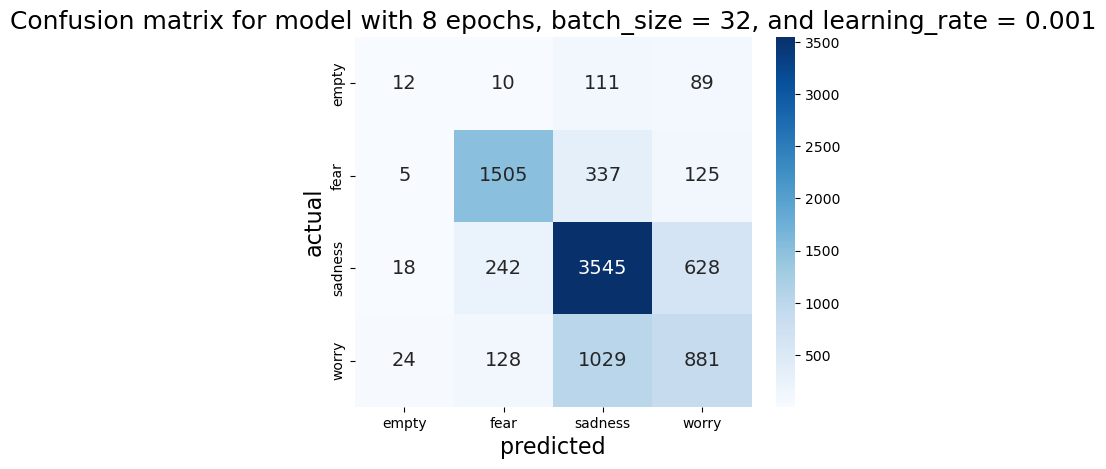

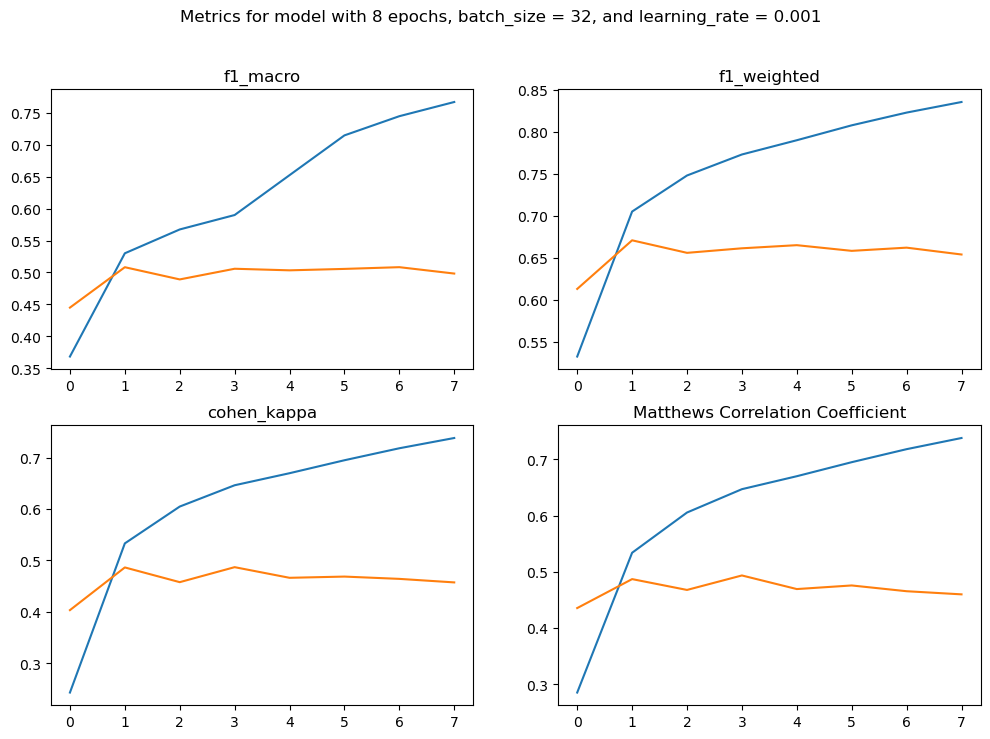

Epoch 1/8
611/611 [==============================] - 11s 15ms/step - loss: 1.0113 - accuracy: 0.5465 - f1_macro: 0.3641 - f1_weighted: 0.5262 - kappa: 0.2275 - MatthewsCorrelationCoefficient: 0.2663 - val_loss: 0.7935 - val_accuracy: 0.6435 - val_f1_macro: 0.4231 - val_f1_weighted: 0.5907 - val_kappa: 0.3660 - val_MatthewsCorrelationCoefficient: 0.4151
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 0.7148 - accuracy: 0.6934 - f1_macro: 0.5087 - f1_weighted: 0.6809 - kappa: 0.4935 - MatthewsCorrelationCoefficient: 0.4968 - val_loss: 0.7366 - val_accuracy: 0.6720 - val_f1_macro: 0.5130 - val_f1_weighted: 0.6721 - val_kappa: 0.4891 - val_MatthewsCorrelationCoefficient: 0.4949
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6072 - accuracy: 0.7486 - f1_macro: 0.5622 - f1_weighted: 0.7419 - kappa: 0.5961 - MatthewsCorrelationCoefficient: 0.5966 - val_loss: 0.7557 - val_accuracy: 0.6783 - val_f1_macro: 0.4949 - val_f1_weighted: 0.6608 - 

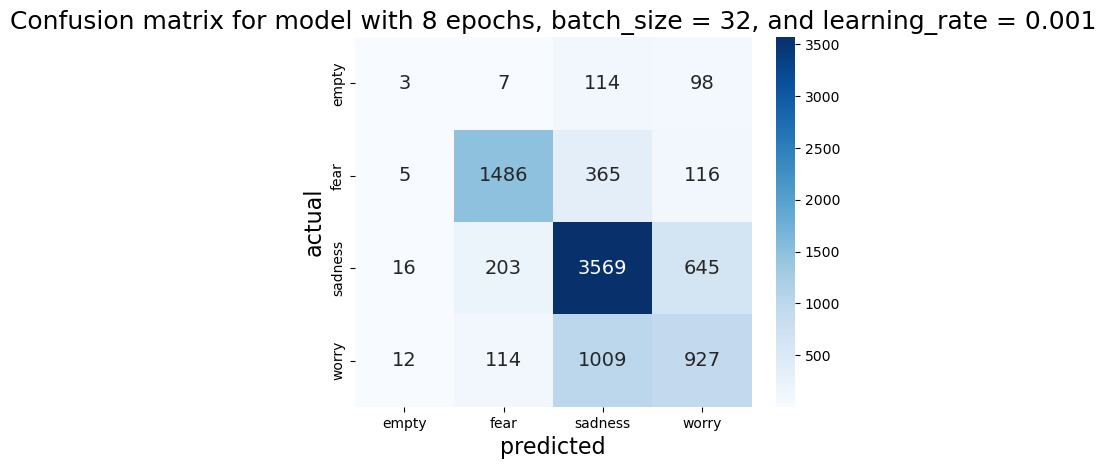

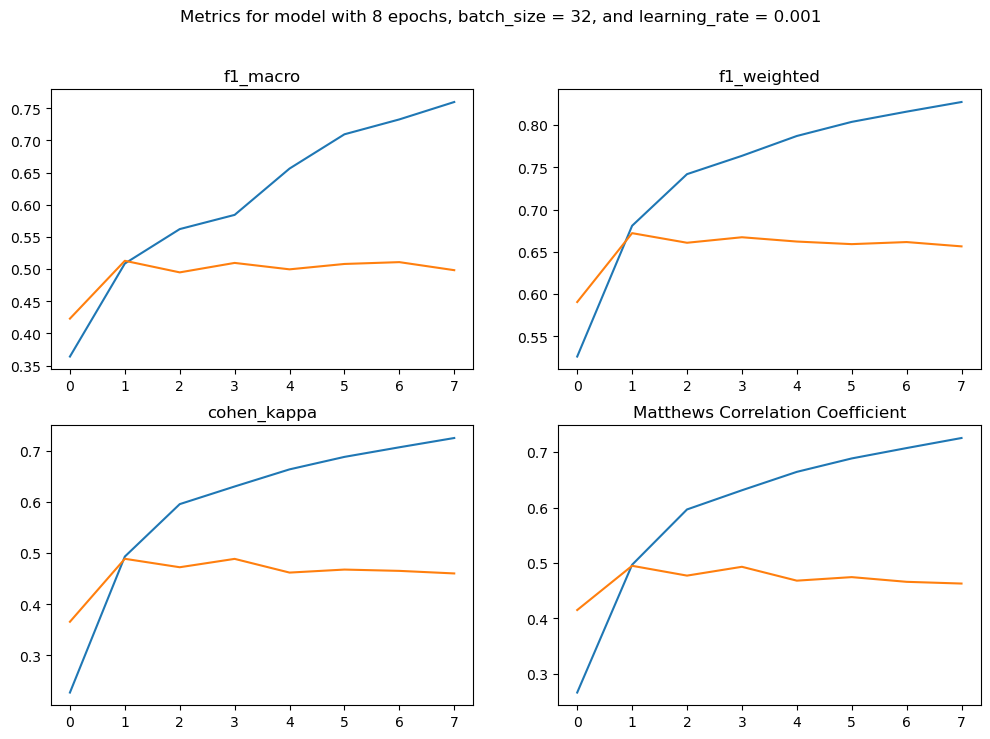

Epoch 1/8
611/611 [==============================] - 10s 16ms/step - loss: 1.0404 - accuracy: 0.5283 - f1_macro: 0.3497 - f1_weighted: 0.5120 - kappa: 0.2016 - MatthewsCorrelationCoefficient: 0.2370 - val_loss: 0.8140 - val_accuracy: 0.6377 - val_f1_macro: 0.4214 - val_f1_weighted: 0.5876 - val_kappa: 0.3539 - val_MatthewsCorrelationCoefficient: 0.4033
Epoch 2/8
611/611 [==============================] - 9s 15ms/step - loss: 0.7416 - accuracy: 0.6841 - f1_macro: 0.5024 - f1_weighted: 0.6730 - kappa: 0.4769 - MatthewsCorrelationCoefficient: 0.4804 - val_loss: 0.7311 - val_accuracy: 0.6765 - val_f1_macro: 0.5081 - val_f1_weighted: 0.6711 - val_kappa: 0.4806 - val_MatthewsCorrelationCoefficient: 0.4823
Epoch 3/8
611/611 [==============================] - 9s 15ms/step - loss: 0.6304 - accuracy: 0.7373 - f1_macro: 0.5554 - f1_weighted: 0.7326 - kappa: 0.5795 - MatthewsCorrelationCoefficient: 0.5805 - val_loss: 0.7547 - val_accuracy: 0.6779 - val_f1_macro: 0.5045 - val_f1_weighted: 0.6677 - 

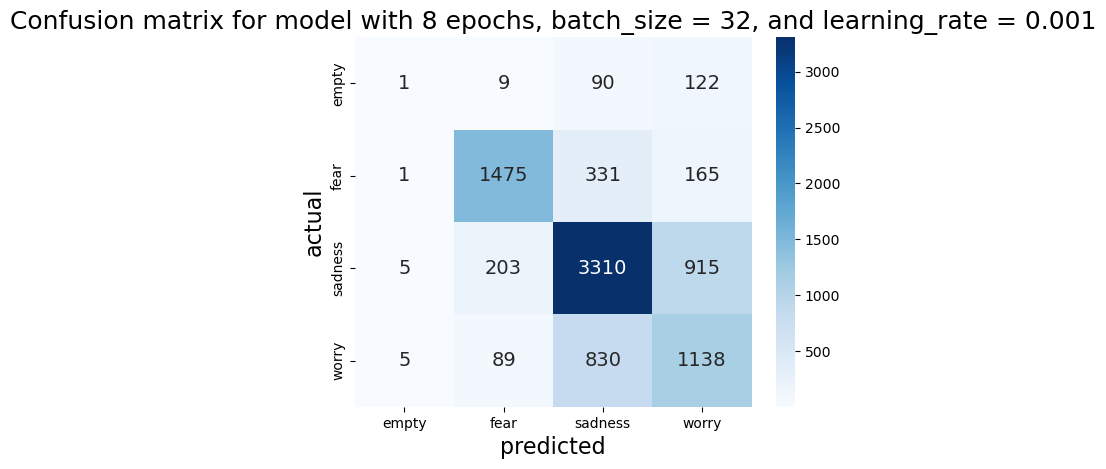

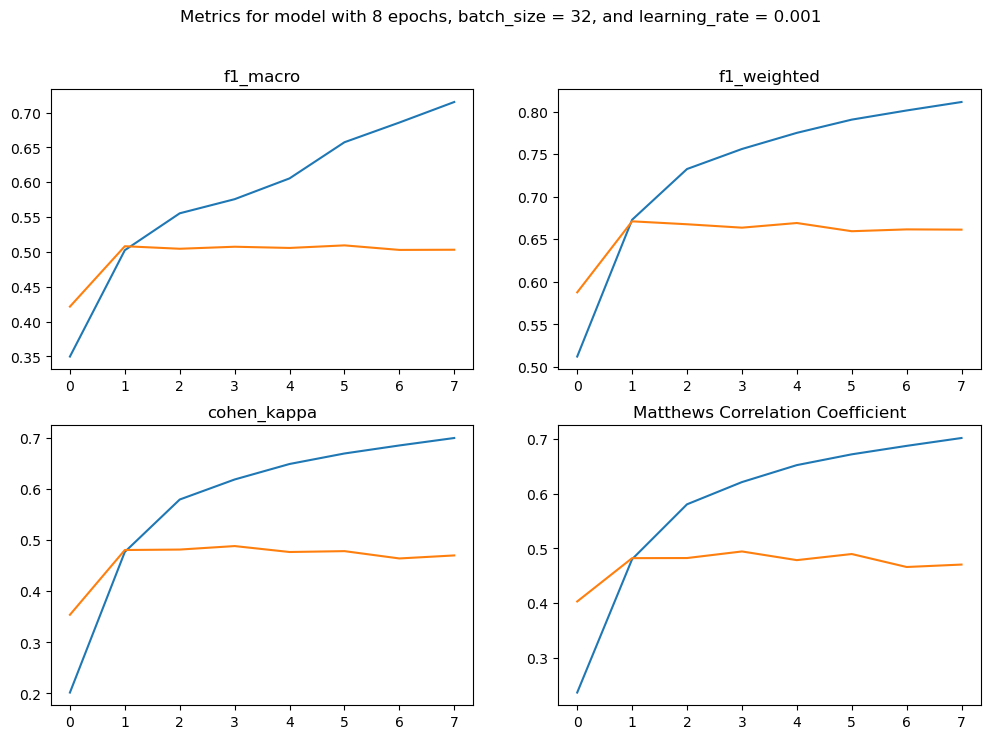

In [225]:
for d in [0.1, 0.2, 0.3, 0.5]:
    build_model_con_mat(epoch = 8, batch_size = 32, learning_rate = 0.001, dropout = d, plot_metrics = True)

In [35]:
import torch

In [36]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
print(prediction)


[[{'label': 'sadness', 'score': 0.000679271062836051}, {'label': 'joy', 'score': 0.9959298968315125}, {'label': 'love', 'score': 0.0009452449739910662}, {'label': 'anger', 'score': 0.001805522944778204}, {'label': 'fear', 'score': 0.0004111042362637818}, {'label': 'surprise', 'score': 0.00022885717044118792}]]


C:\Users\RaviB\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [37]:
from transformers import DistilBertTokenizer, DistilBertModel


In [38]:
from transformers import DistilBertTokenizer, DistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
encoded_data = tokenizer(
    X.tolist(),  # Convert your pandas Series to a list of strings
    padding=True,  # Pad sequences to have the same length
    truncation=True,  # Truncate sequences to a maximum length
    return_tensors='pt',  # Return PyTorch tensors
    max_length=50  # Specify the maximum sequence length you want to use
)

In [46]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [47]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

dataset = TensorDataset(
    encoded_data['input_ids'],  # Input IDs
    encoded_data['attention_mask'],  # Attention masks
    torch.tensor(y_encoded, dtype=torch.long)  # Labels
)

In [48]:
# Create a DataLoader to batch and shuffle your data
batch_size = 32  # Adjust as needed
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [49]:
X_train, X_temp, y_train, y_temp = train_test_split(
    encoded_data['input_ids'],
    y_encoded,
    test_size=0.3,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

In [50]:
import torch.nn as nn

# Define the classification head
num_emotions = 4  # Assuming you have 4 emotions
classification_head = nn.Sequential(
    nn.Linear(768, 256),  # 768 is the output size of DistilBERT
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 4)
)

In [53]:
import torch.optim as optim
num_epochs = 5

# Define your optimizer
optimizer = optim.Adam(list(model.parameters()) + list(classification_head.parameters()), lr=1e-5)

# Define your loss function (e.g., CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    for batch in dataloader:  # Iterate over your data
        input_ids, attention_mask, label = batch
        #input_ids, attention_mask = inputs  # Unpack inputs
        #outputs = model(batch['input_ids'], attention_mask=batch['attention_mask'])
        
        
        
        batch = {"input_ids": input_ids, "attention_mask": attention_mask, "label": label}

        # Forward pass through DistilBERT
        outputs = model(batch["input_ids"], attention_mask=batch["attention_mask"])
        #.last_hidden_state[:, 0, :]

        # Forward pass through the classification head
        outputs = classification_head(outputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


TypeError: linear(): argument 'input' (position 1) must be Tensor, not BaseModelOutput

In [34]:
for batch in dataloader:
    #print(batch[0:1])
    pass

NameError: name 'dataloader' is not defined